# Clasificador paisajes
Para este ejercicio vas a crear un clasificador automático de paisajes. Los datos los encontrarás en el Classroom como `seg_train.zip` y `seg_test.zip`. Se pide:
1. Cargar las imágenes. Mira cómo están almacenados los datos. Tendrás que recorrer las carpetas, cargar las imágenes en memoria y etiquetarlas con los nombres de las carpetas. Realiza un reshape de cada imagen (comienza el ejercicio con 32x32, para ir más rápido en las ejecuciones).
2. Investiga las imágenes, comprueba con algunas muestras que has cargado bien los datos.
3. Normaliza
4. Diseña la arquitectura de la red. Recuerda que es un algoritmo de clasificación. Ojo con las dimensiones de la entrada
5. Reserva un 20% de los datos del entrenamiento para validar.
6. Representa el objeto history
7. Evalua el modelo con los datos de test
8. Representa algunos de los paisajes donde el modelo comete errores
9. Crea una matriz de confusión con los errores del modelo

**NOTA apartado 1**: para el apartado 1 tendras que recorre las carpetas/imagenes con `os.listdir()`, e ir cargando todas las imagenes como arrays de numpy

**NOTA apartado 4**: empieza con un par de capas Conv2D + MaxPooling2D con activación relu y después la fully connected layer. on softmax como ultima capa

# 1. Datos y transformación.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
import cv2
from skimage.io import imread

from tensorflow import keras
from sklearn.metrics import confusion_matrix

In [2]:
class_names = ["buildings", "forest", "glacier", "mountain", "sea", "street"]
class_names_d = {class_name:i for i, class_name in enumerate(class_names)}
class_names_d

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

In [3]:
os.getcwd()

'c:\\Users\\Diego Nuñez\\Desktop\\CURSO_VITORIA\\3-Machine_Learning\\3-Deep_Learning\\3-ComputerVision\\ejercicios'

In [4]:
os.listdir(os.getcwd() + "\\paisajes\\seg_train")

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

In [5]:
IMAGE_SIZE = (32, 32)
TRAIN_PATH = os.getcwd() + "\\paisajes\\seg_train"
TEST_PATH = os.getcwd() + "\\paisajes\\seg_test"

print(TRAIN_PATH)
print(TEST_PATH)

c:\Users\Diego Nuñez\Desktop\CURSO_VITORIA\3-Machine_Learning\3-Deep_Learning\3-ComputerVision\ejercicios\paisajes\seg_train
c:\Users\Diego Nuñez\Desktop\CURSO_VITORIA\3-Machine_Learning\3-Deep_Learning\3-ComputerVision\ejercicios\paisajes\seg_test


In [6]:
def read_data_2(path, im_size, class_names_label):
    X = []
    y = []

    for folder in os.listdir(path):
        print("Recorriendo ", folder)
        label = class_names_label[folder]
        folder_path = os.path.join(path, folder)
        for file in os.listdir(folder_path):
            image_path = os.path.join(folder_path, file)
            try:
                image = imread(image_path)
                smallimage = cv2.resize(image, im_size)
                X.append(smallimage)
                y.append(label)
            except Exception as e:
                print("Error en la lecura", image_path)
                print(e)
    return np.array(X), np.array(y)


In [7]:
X_train, y_train = read_data_2(TRAIN_PATH, IMAGE_SIZE, class_names_d)

Recorriendo  buildings
Recorriendo  forest
Recorriendo  glacier
Recorriendo  mountain
Recorriendo  sea
Recorriendo  street


In [8]:
X_test, y_test = read_data_2(TEST_PATH, IMAGE_SIZE, class_names_d)

Recorriendo  buildings
Recorriendo  forest
Recorriendo  glacier
Recorriendo  mountain
Recorriendo  sea
Recorriendo  street


In [9]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(14034, 32, 32, 3)
(3000, 32, 32, 3)
(14034,)
(3000,)


# 2. Analisis.

In [10]:
pd.Series(y_train).value_counts()

3    2512
2    2404
5    2382
4    2274
1    2271
0    2191
Name: count, dtype: int64

In [11]:
pd.Series(y_test).value_counts()

2    553
3    525
4    510
5    501
1    474
0    437
Name: count, dtype: int64

In [12]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train, random_state=14)
X_test, y_test = shuffle(X_test, y_test, random_state=14)

forest


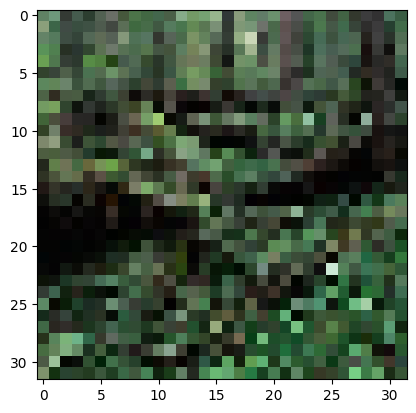

In [17]:
index = np.random.randint(X_train.shape[0])
print(class_names[y_train[index]])
plt.imshow(X_train[index])

In [18]:
X_train = X_train/255
X_test = X_test/255

# 3. MODELO.


In [44]:
modelo = keras.Sequential([
    # Capa 1 convolucional
    keras.layers.Conv2D(64, (3,3), input_shape = (32, 32, 3)), 
    keras.layers.MaxPooling2D(2,2),
    # Capa 2 convolucional
    keras.layers.Conv2D(32, (3,3)), 
    keras.layers.MaxPooling2D(2,2),
    # Capa 3 convolucional
    keras.layers.Conv2D(16, (3,3)), 
    keras.layers.MaxPooling2D(2,2),
    # Capas de red neuronal.
    keras.layers.Flatten(),
    keras.layers.Dense(32,activation="relu"),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(6, activation="softmax")

])

In [37]:
modelo.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)              │ (None, 30, 30, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 13, 13, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 4, 4, 16)       │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 2, 2, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 6)              │           102 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,590 (107.77 KB)

 Trainable params: 27,590 (107.77 KB)

 Non-trainable params: 0 (0.00 B)

In [42]:
modelo.compile(optimizer="adam", loss = "binary_crossentropy", metrics= ["accuracy"])

In [43]:
history = modelo.fit(
    X_train,
    y_train, 
    batch_size = 128, 
    epochs = 20,
    validation_split = 0.1)

Epoch 1/20


ValueError: Arguments `target` and `output` must have the same rank (ndim). Received: target.shape=(None,), output.shape=(None, 6)

In [27]:
df_hist = pd.DataFrame(history.history, index=np.arange(1,21))
df_hist

,accuracy,loss,val_accuracy,val_loss
1,0.426128,1.404787,0.543447,1.198113
2,0.569913,1.107102,0.600427,1.086007
3,0.627553,0.987804,0.637464,1.001915
4,0.646318,0.926192,0.660256,0.923035
5,0.678147,0.864917,0.661681,0.898289
6,0.690103,0.833094,0.683761,0.854303
7,0.702454,0.800503,0.705128,0.846965
8,0.715281,0.777103,0.704416,0.830842
9,0.719240,0.759024,0.690171,0.842515
10,0.728108,0.741891,0.696581,0.841401


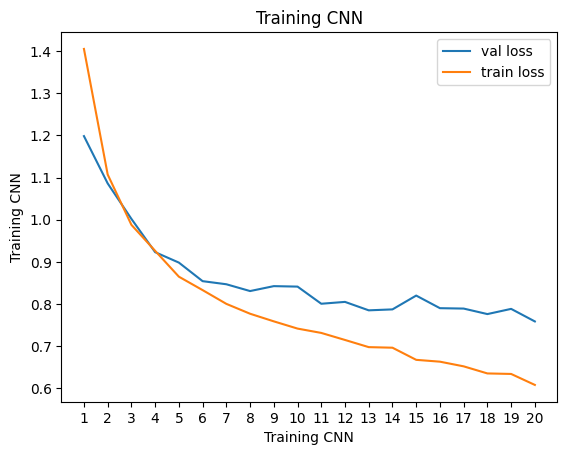

In [ ]:
plt.plot(df_hist['val_loss'], label="val loss")
plt.plot(df_hist['loss'], label="train loss")
plt.title("Training CNN")
plt.xlabel("Training CNN")
plt.ylabel("Training CNN")
plt.xticks(np.arange(1,21))
plt.legend()

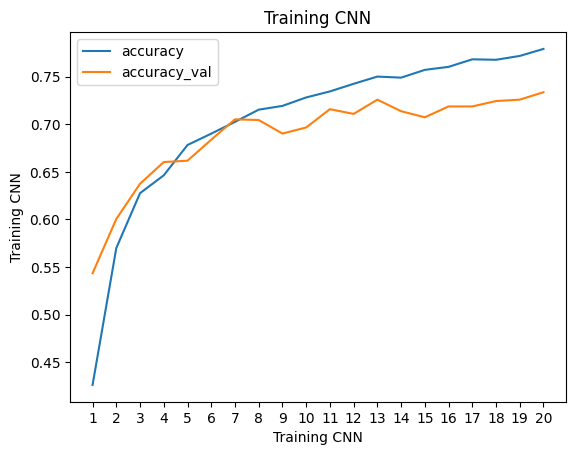

In [28]:
plt.plot(df_hist['accuracy'], label="accuracy")
plt.plot(df_hist['val_accuracy'], label="accuracy_val")
plt.title("Training CNN")
plt.xlabel("Training CNN")
plt.ylabel("Training CNN")
plt.xticks(np.arange(1,21))
plt.legend()

In [32]:
y_pred = modelo.predict(X_test)
y_pred.round(2)

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


array([[0.  , 1.  , 0.  , 0.  , 0.  , 0.  ],
       [0.01, 0.99, 0.  , 0.  , 0.  , 0.01],
       [0.12, 0.1 , 0.01, 0.  , 0.03, 0.74],
       ...,
       [0.  , 0.  , 0.94, 0.04, 0.02, 0.  ],
       [0.  , 0.  , 0.78, 0.17, 0.05, 0.  ],
       [0.15, 0.  , 0.  , 0.  , 0.  , 0.85]], dtype=float32)

street
[0.1172898  0.09642408 0.00602752 0.00270102 0.03294967 0.74460787]


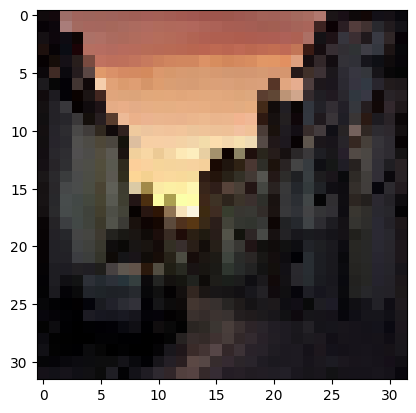

In [33]:
print(class_names[y_test[2]])
print(y_pred[2])
plt.imshow(X_test[2])